# Data Exploration with Python

(Review Reading Assignments: Analyzing Tabular Omics Data using Pandas DataFrames, and Data Visualization/Data Visualization with Seaborn)

## Check package versions

In [2]:
import sys
!{sys.executable} -m pip install seaborn==0.13.2

Looking in links: file:///Users/yeemayseah/.pip/wheelhouse
     |████████████████████████████████| 294 kB 9.1 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [5]:
!{sys.executable} -m pip install matplotlib==3.7.5

Looking in links: file:///Users/yeemayseah/.pip/wheelhouse
     |████████████████████████████████| 7.4 MB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 8.8 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0


In [21]:
from urllib.request import urlretrieve
import pandas as pd
import seaborn as sns

## 1. Explore [this dataset on infectious diseases from the CA Dept. of Public Health](https://catalog.data.gov/dataset/infectious-diseases-by-disease-county-year-and-sex-d8912).

In [22]:
# Save the web address (url) in a python string
dataset_url = 'https://data.chhs.ca.gov/dataset/03e61434-7db8-4a53-a3e2-1d4d36d6848d/resource/75019f89-b349-4d5e-825d-8b5960fc028c/download/odp_idb_2001_2022_ddg_compliant.csv'

# Set the name of the file where we want to save the data
data_file_name = 'ca_id.csv'

# Download the data
urlretrieve(dataset_url, data_file_name)

('ca_id.csv', <http.client.HTTPMessage at 0x7fe8343cdc10>)

In [23]:
# Load the text version of the table (a csv file) into python using pandas
feature_table = pd.read_csv(data_file_name)

In [24]:
feature_table.shape

(189921, 9)

In [25]:
feature_table.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
0,Anaplasmosis,Alameda,2001,Female,0.0,746596,-,0.0,0.494
1,Anaplasmosis,Alameda,2001,Male,0.0,718968,-,0.0,0.513
2,Anaplasmosis,Alameda,2001,Total,0.0,1465564,-,0.0,0.252
3,Anaplasmosis,Alameda,2002,Female,0.0,747987,-,0.0,0.493
4,Anaplasmosis,Alameda,2002,Male,0.0,720481,-,0.0,0.512


## 2. Select a disease of your choice. Plot the number of cases of that disease by county, for the year 2022.

In [26]:
%matplotlib inline
# Apply the theme
sns.set_context("notebook", font_scale=1.0)

In [27]:
print(pd.__version__)
print(sns.__version__)

1.3.4
0.13.2


In [28]:
disease_2022 = feature_table.loc[(feature_table['Disease'] == 'Leprosy') &
                  (feature_table['Year'] == 2022)]

In [29]:
disease_2022.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI
87501,Leprosy,Alameda,2022,Female,0.0,856569,-,0.0,0.431
87502,Leprosy,Alameda,2022,Male,0.0,832969,-,0.0,0.443
87503,Leprosy,Alameda,2022,Total,0.0,1638979,-,0.0,0.225
87567,Leprosy,Alpine,2022,Female,0.0,576,-,0.0,638.384
87568,Leprosy,Alpine,2022,Male,0.0,563,-,0.0,653.077


Text(0.5, 1.0, 'Leprosy in California Counties, 2022')

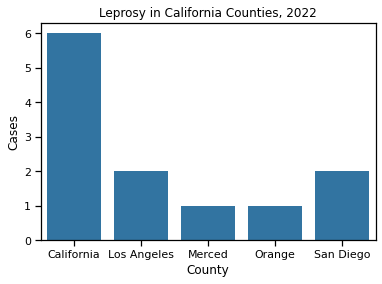

In [30]:
sns.barplot(data=disease_2022.loc[disease_2022['Cases'] > 0], x='County', y='Cases').set_title('Leprosy in California Counties, 2022')

## 3. Select a disease of your choice. Plot the number of cases of that disease in Los Angeles between the years 2001-2010.

In [31]:
disease_la = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                  (feature_table['County'] == 'Los Angeles')]

Text(0.5, 1.0, 'Shigellosis in Los Angeles, 2001-2022')

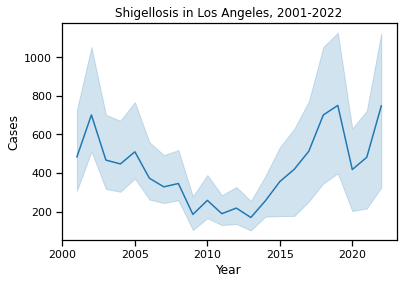

In [32]:
sns.lineplot(data=disease_la, x='Year', y='Cases').set_title('Shigellosis in Los Angeles, 2001-2022')

## 4. Create another plot of your choice, with an appropriate title.

In [48]:
shigellosis = feature_table.loc[(feature_table['Disease'] == 'Shigellosis') &
                             ((feature_table['County'] == 'San Francisco') |
                              (feature_table['County'] == 'Los Angeles') |
                              (feature_table['County'] == 'Sacramento'))].copy()

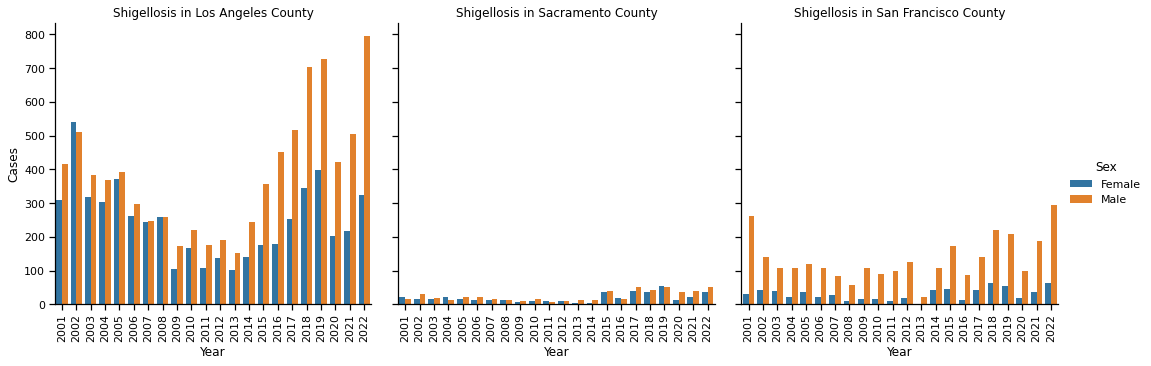

In [49]:
ax = sns.catplot(kind='bar', data=shigellosis.loc[shigellosis['Sex'] != 'Total'], x='Year', y='Cases', hue='Sex', col='County')
# Rotate labels
ax.tick_params(axis='x', rotation=90)
ax.set_titles("Shigellosis in {col_name} {col_var}")

In [50]:
shigellosis['Cases_per_Population'] = shigellosis['Cases'] / shigellosis['Population']
shigellosis['Cases_per_100kPopulation'] = 100000 * shigellosis['Cases'] / shigellosis['Population']

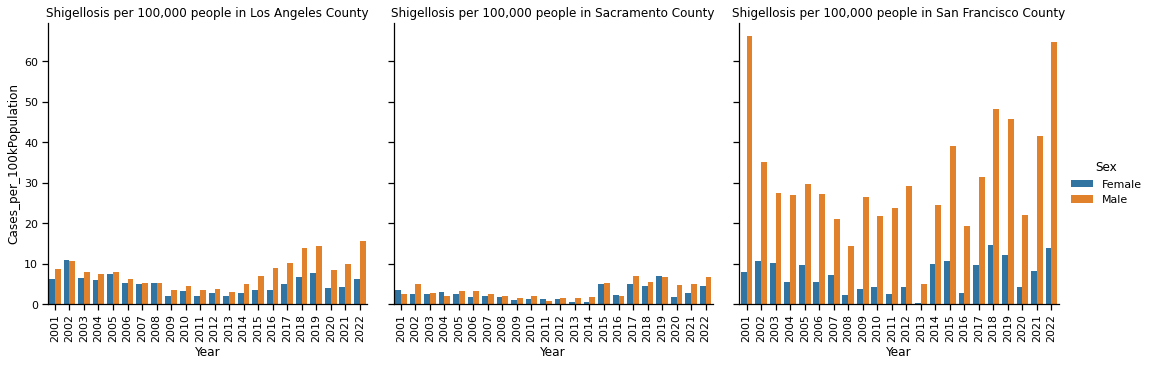

In [52]:
ax2 = sns.catplot(kind='bar', data=shigellosis.loc[shigellosis['Sex'] != 'Total'], x='Year', y='Cases_per_100kPopulation', hue='Sex', col='County')
# Rotate labels
ax2.tick_params(axis='x', rotation=90)
ax2.set_titles("Shigellosis per 100,000 people in {col_name} {col_var}")

In [53]:
shigellosis.head()

,Disease,County,Year,Sex,Cases,Population,Rate,Lower_95__CI,Upper_95__CI,Cases_per_Population,Cases_per_100kPopulation
150996,Shigellosis,Los Angeles,2001,Female,308.0,4880163,6.311,5.626,7.057,0.000063,6.311265
150997,Shigellosis,Los Angeles,2001,Male,416.0,4755632,8.748,7.927,9.630,0.000087,8.747523
150998,Shigellosis,Los Angeles,2001,Total,728.0,9635795,7.555,7.016,8.124,0.000076,7.555163
150999,Shigellosis,Los Angeles,2002,Female,539.0,4924247,10.946,10.041,11.910,0.000109,10.945836
151000,Shigellosis,Los Angeles,2002,Male,512.0,4798197,10.671,9.766,11.636,0.000107,10.670675
